# <div style="display:fill;border-radius:5px;background-color:#676F9F;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#F1EFF5;overflow:hidden;margin:0;font-size:150%;font-style: Helvetica;text-align:center"><b></b>WHAT IF DOCTOR🧑‍⚕️ PREPARES AN AI MODEL??🤔</p></div>

In the previous notebook, we have created a dataset to prepare AI model and in this notebook, lets explore the same...

## <font color='#4287f5'> Exploratory Data Analysis....</font>

In [1]:
import os
import pandas as pd                       # library for data manipulation (data cleaning,analysing...)
import numpy as np                        # library for numerical computation
import matplotlib.pyplot as plt           # library for data visualization which is built on NumPy arrays
%matplotlib inline
import seaborn as sns                     # library for data visualization built on top of matplotlib and 
                                          # closely integrated with pandas data structures in Python.
    
import pandas_profiling                   # library to generate a basic report on the input DataFrame


import warnings                           # to avoid warning flash
warnings.filterwarnings('ignore')

# Other libraries will be imported in the following steps as the process moves.... 

In [7]:
#Load the dataset which we have created previously......
df = pd.read_csv(r'D:\DSF\PROJECTPRO\MEDICAL_PROJECTS\1. DIABETES_MELLITUS\created_diabetes.csv')

In [8]:
#columns = ['ID', 'age', 'sex', 'FPG', 'OGTT', 'A1C', 'urine_proteins', 'CLASS']

In [9]:
df.head()

,ID,age,sex,FPG,OGTT,A1C,urine_proteins,CLASS
0,0,56,0,170,319,7.43,2,2
1,1,61,1,91,109,5.25,0,0
2,2,55,0,167,259,7.76,2,2
3,3,61,1,203,329,6.93,2,2
4,4,28,1,210,280,7.63,2,2


In [10]:
df.columns

Index(['ID', 'age', 'sex', 'FPG', 'OGTT', 'A1C', 'urine_proteins', 'CLASS'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1000 non-null   int64  
 1   age             1000 non-null   int64  
 2   sex             1000 non-null   int64  
 3   FPG             1000 non-null   int64  
 4   OGTT            1000 non-null   int64  
 5   A1C             1000 non-null   float64
 6   urine_proteins  1000 non-null   int64  
 7   CLASS           1000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


In [12]:
df.describe()

,ID,age,sex,FPG,OGTT,A1C,urine_proteins,CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.501000,49.568000,0.474000,141.004000,223.955000,6.575870,1.392000,1.396000
std,288.821169,14.886739,0.499573,41.391923,75.632263,0.944463,0.822808,0.820888
min,0.000000,10.000000,0.000000,70.000000,100.000000,4.500000,0.000000,0.000000
25%,249.750000,39.000000,0.000000,106.000000,153.000000,5.847500,1.000000,1.000000
50%,499.500000,50.000000,0.000000,141.500000,226.000000,6.765000,2.000000,2.000000
75%,749.250000,59.000000,1.000000,176.000000,289.000000,7.320000,2.000000,2.000000
max,1000.000000,99.000000,1.000000,210.000000,350.000000,8.000000,2.000000,2.000000


As far as the values are concerned, meaning or intuition of the values are rather important than their statistical significance.

In [13]:
df.isnull().any()

ID                False
age               False
sex               False
FPG               False
OGTT              False
A1C               False
urine_proteins    False
CLASS             False
dtype: bool

In [14]:
df.isnull().sum()          ############ NO MISSING VALUES

ID                0
age               0
sex               0
FPG               0
OGTT              0
A1C               0
urine_proteins    0
CLASS             0
dtype: int64

Since the dataset is hand made, there are no missing values but in real world, the dataset usually will be filled with more number of missing values.

In [ ]:
#############################################   DUMMY_EXERCISE  ###################################################################################

Lets incorporate some of the missing values to the above dataset and also fill those missing values with some of the methods.

In [93]:
# Lets make a copy of the above dataset
df1 =df.copy()

In [94]:
import random
random.seed(42)
sample_rows1 = random.sample(range(0,1000),35)    # selecting 35 random rows to insert nan values in 'A1c' column
sample_rows2 = random.sample(range(0,1000),20)    # selecting 20 random rows to insert nan values in 'FPG' column
sample_rows3 = random.sample(range(0,1000),15)    # selecting 15 random rows to insert nan values in 'urine_proteins' column

In [95]:
df1.loc[sample_rows1,'A1C'] = np.nan

In [96]:
df1.loc[sample_rows2,'FPG'] = np.nan

In [97]:
df1.loc[sample_rows3,'urine_proteins'] = np.nan

In [98]:
missing = df1.isnull().to_numpy().nonzero()
missing

(array([  6,  25,  27,  30,  32,  44,  80,  89,  94,  95,  99, 104, 104,
        114, 127, 142, 159, 163, 203, 220, 223, 225, 228, 238, 250, 270,
        281, 284, 284, 344, 348, 352, 367, 387, 389, 429, 432, 432, 459,
        470, 517, 549, 558, 565, 574, 603, 604, 616, 618, 654, 665, 692,
        714, 718, 733, 747, 754, 758, 759, 777, 781, 825, 826, 828, 867,
        890, 913, 944, 980, 996], dtype=int64),
 array([3, 5, 5, 5, 5, 6, 6, 5, 3, 5, 3, 3, 5, 5, 6, 5, 3, 3, 5, 3, 5, 5,
        5, 5, 5, 6, 5, 3, 5, 3, 3, 6, 3, 6, 3, 5, 3, 5, 5, 6, 5, 6, 5, 6,
        5, 5, 5, 5, 6, 5, 5, 5, 3, 5, 5, 6, 5, 5, 5, 3, 3, 3, 6, 3, 6, 3,
        5, 6, 3, 6], dtype=int64))

In [ ]:
# ways to find the index of missing values
rows_with_nan = [index for index, row in df2.iterrows() if row.isnull().any()]    #1
df2[df2['CLASS'].isnull()].index.tolist()                                         #2
r = df2.isnull().to_numpy().nonzero()                                             #3 gives both rows and columns

In [99]:
df1.isnull().sum()

ID                 0
age                0
sex                0
FPG               20
OGTT               0
A1C               35
urine_proteins    15
CLASS              0
dtype: int64

In [ ]:
# df1[df1.isnull().any(axis=1)]

In [100]:
print("Mean of 'A1C'values :", np.mean(df1.A1C),',','\n'
      "Mean of 'FPG'values :", np.mean(df1.FPG), 'and','\n'
      "Median of 'urine_proteins'values :", np.median(df.urine_proteins))

Mean of 'A1C'values : 6.574093264248705 , 
Mean of 'FPG'values : 141.12755102040816 and 
Median of 'urine_proteins'values : 2.0


In [101]:
mean_A1C = np.mean(df1.A1C)
mean_FPG = np.mean(df1.FPG)
median_urine = np.median(df1.urine_proteins)

In [ ]:
df1['A1C'] = df1.replace(np.nan,mean_A1C,inplace=True)   # replacing missing values in A1C column with their mean values as the feature 'A1C' is continuous

In [ ]:
df1['FPG'] = df1.replace(np.nan,mean_FPG,inplace=True) # replacing missing values in FPG column with their mean values as the feature 'FPG' is continuous

In [ ]:
df1['urine_proteins'] = df1.replace(np.nan,median_urine,inplace=True)

In [ ]:
################################################  THE END  ################################################################################

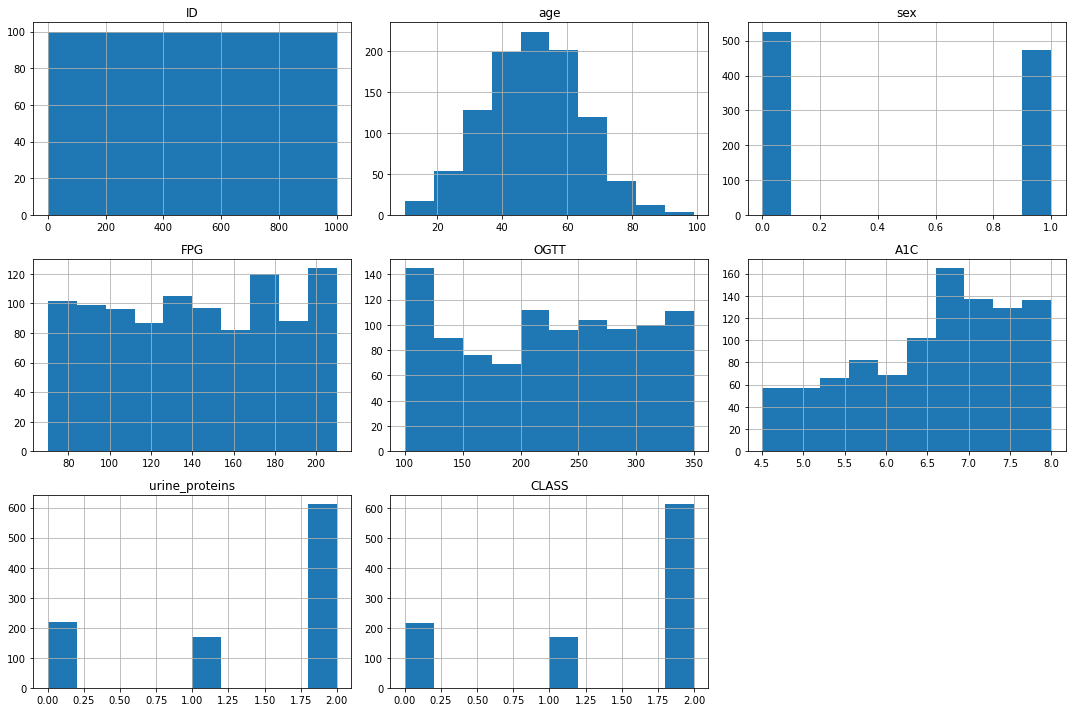

In [15]:
%matplotlib inline
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

* There's CLASS IMBALANCE but as I am more focused on the models like Decision Trees, I am not worried about this class imbalance problem  
* Only age is normally distributed,other features like 'FPG','OGTT','A1C' are unevenly distributed and remaining features are categorical.

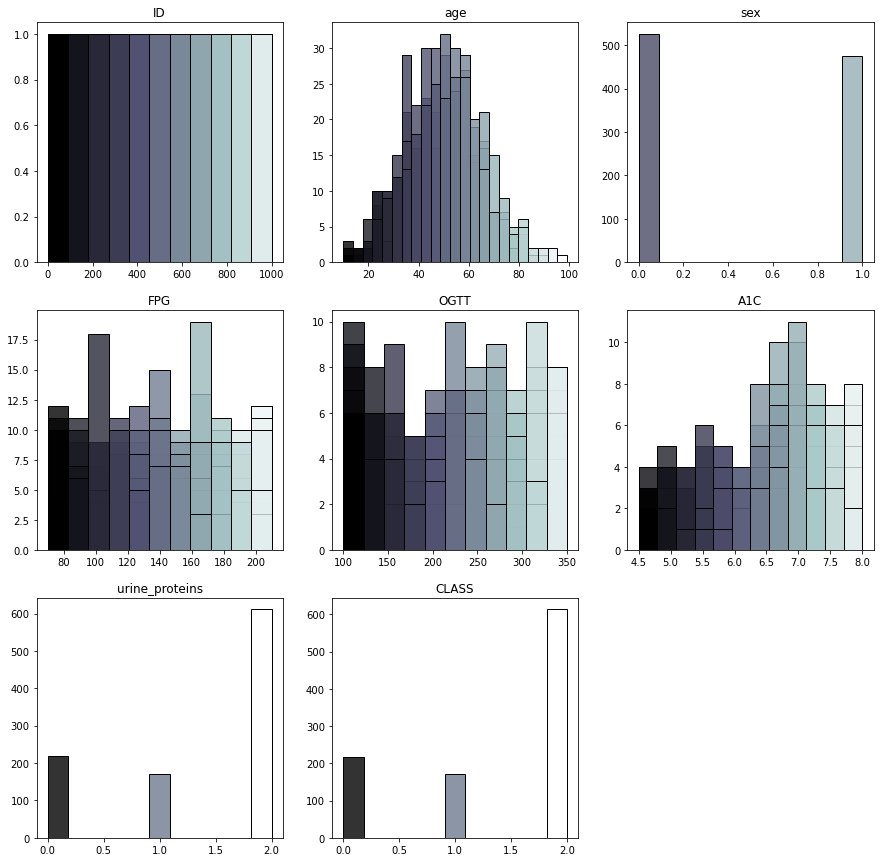

In [16]:
# Lets create histogram for each features.. 

# create a subplot of 3 x 3
data = df
plt.subplots(3,3,figsize=(15,15))


# Plot a histplot for each variable

for idx, col in enumerate(data.columns):
    ax = plt.subplot(3,3,idx+1)
    sns.histplot(data, x = col, hue = col, legend=False, palette = 'bone',alpha=0.8)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(col)

plt.subplot(3,3,9).set_visible(False)
plt.show()

In [17]:
# Lets get the percentage of 'Outcome' class...

def get_percentage(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

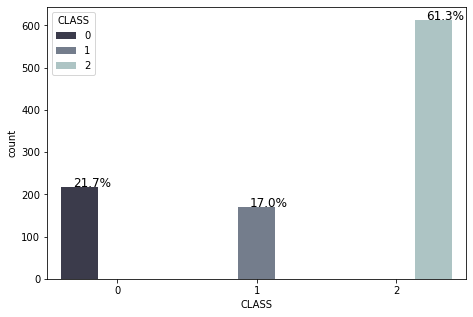

In [18]:
plt.figure(figsize=(7.5,5))
ax = sns.countplot(x='CLASS',data=df,palette='bone',hue = 'CLASS')
plt.xlabel('CLASS')
plt.ylabel('count')

get_percentage(ax,data.CLASS)

In [19]:
import warnings                           # to avoid warning flash
warnings.filterwarnings('ignore')

###  Lets plot the <b><u>distribution plot</b></u> to find the difference in distribution among the diabetics,pre-diabetics and non-diabetics....

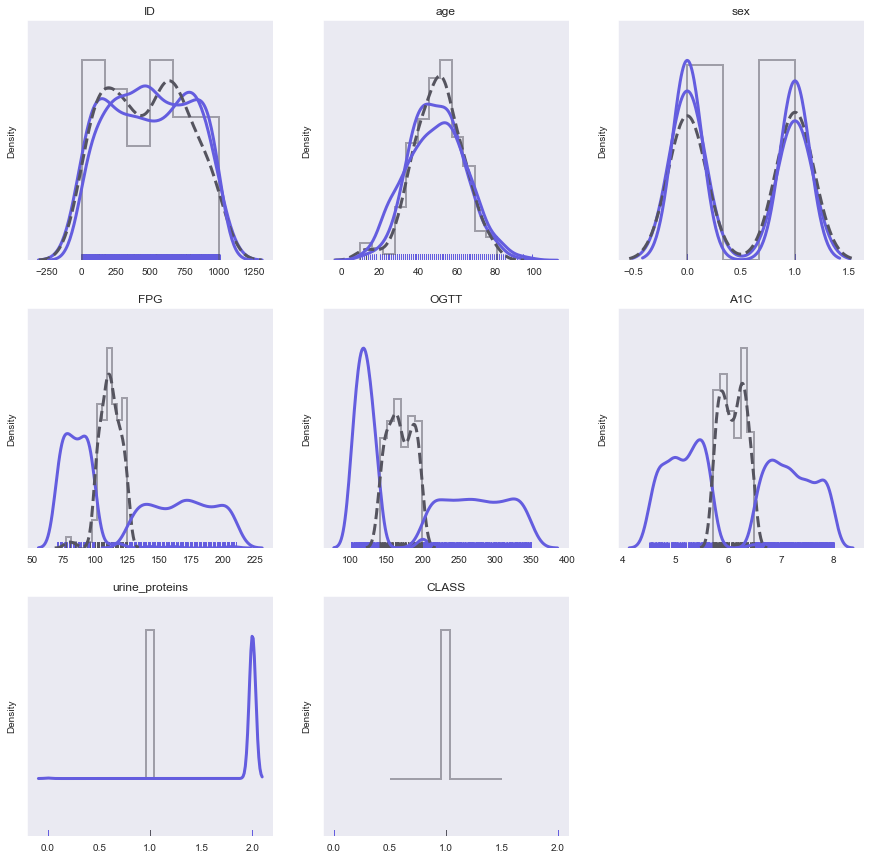

In [20]:
# create a subplot of 3 x 3
sns.set_style('dark')
plt.subplots(3,3,figsize=(15,15))
data = df

# Plot a density plot for each variable

for idx, col in enumerate(data.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])

    sns.distplot(data.loc[data.CLASS == 0][col],hist=False, axlabel= False,rug=True,rug_kws={"color": "#645DDF"},
                  kde_kws={"color": "#645DDF", "lw": 3, "label": "No Diabetes"},)

    sns.distplot(data.loc[data.CLASS == 1][col], axlabel= False,rug=True,rug_kws={"color": "#55545F"},
                 hist_kws={"histtype": "step", "linewidth": 2, "alpha": 0.5, "color": "#55545F"},
                    kde_kws={"linestyle":'--',"color": "#55545F", "lw": 3, "label": "Pre-Diabetes"},)
    
    sns.distplot(data.loc[data.CLASS == 2][col],hist=False, axlabel= False,rug=True,rug_kws={"color": "#645DDF"},
                  kde_kws={"color": "#645DDF", "lw": 3, "label": "Diabetes"},)
    
    ax.set_title(col)
 
                  
# Hide the 9th subplot (bottom right) since there are only 8 plots

plt.subplot(3,3,9).set_visible(False)
plt.show()

The above plots doesn't give much intuition about the dataset...

###  Lets visualize the distribution of variables with <u>boxplot</u> to see the outliers..

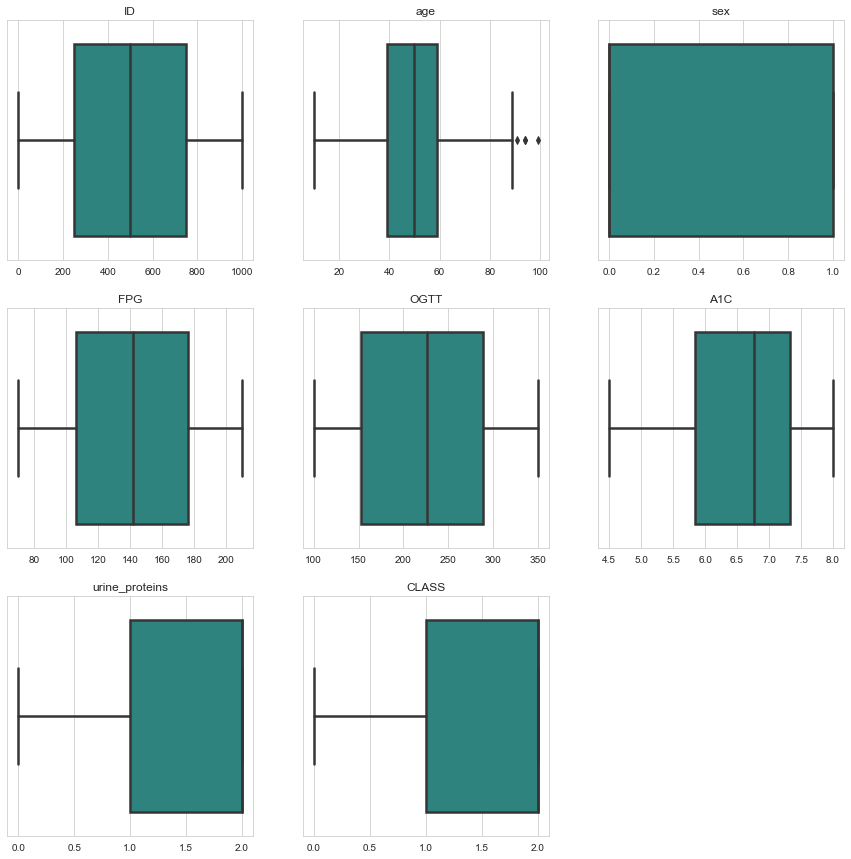

In [103]:
# create a subplot of 3 x 3
sns.set_style('whitegrid')
plt.subplots(3,3,figsize=(15,15))


# Plot a boxplot for each variable

for idx, col in enumerate(data.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])

    sns.boxplot(x = col, data = df, hue = col, palette = 'viridis',linewidth=2.5)
    ax.set_xlabel(None)

    ax.set_title(col)
 
# Hide the 9th subplot (bottom right) since there are only 8 plots

plt.subplot(3,3,9).set_visible(False)
plt.show()

Again, as the dataset is hand made, there are no significant outliers except for the age column

There are still various visualization plots which can be plotted but as of now,I think its more than enough for the above created hand made dataset.